In [1]:
import keras
keras.__version__
import matplotlib.pyplot as plt

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
from keras import layers
from keras import models

# Building the CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Building CNN
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

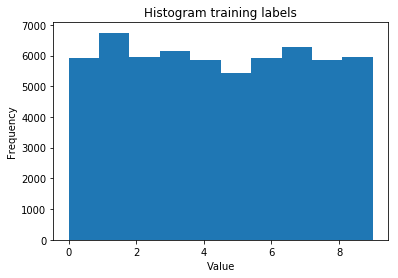

In [7]:
plt.hist(train_labels)

plt.title("Histogram training labels")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()

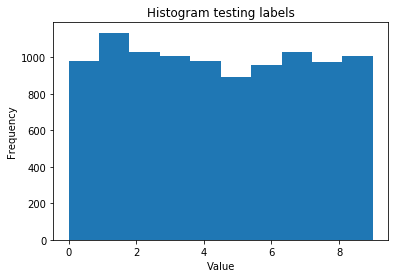

In [8]:
plt.hist(test_labels)

plt.title("Histogram testing labels")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()

In [9]:
# The images are reshaped and rescaled 
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [10]:
# shuffle the training dataset & set aside val_perc % of rows as validation data
import numpy as np
for _ in range(5): 
    indexes = np.random.permutation(len(train_images))

# randomly sorted
train_images = train_images[indexes]
train_labels = train_labels[indexes]

# now we will set-aside val_perc% of the train_data/labels as cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_images))

# first pick validation set
val_data = train_images[:val_count,:]
val_labels = train_labels[:val_count,:]

# leave rest in training set
train_data2 = train_images[val_count:,:]
train_labels2 = train_labels[val_count:,:]

train_data2.shape, train_labels2.shape, val_data.shape, val_labels.shape, test_images.shape, test_labels.shape

((54000, 28, 28, 1),
 (54000, 10),
 (6000, 28, 28, 1),
 (6000, 10),
 (10000, 28, 28, 1),
 (10000, 10))

In [11]:
test_accuracy_value = []
def train_model(optimizer):
    
    '''This function trains the convolutional neural network on the MNIST training set. The early stopping point 
    will be established and the accuracy of the model will be calculated on the MNIST test set. The function takes
    name of the optimizer as argument.'''
    
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    save_best = keras.callbacks.ModelCheckpoint('best.weights', monitor='val_loss', verbose=1, save_best_only=True)
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1)

    history = model.fit(train_data2, train_labels2, epochs=100, batch_size=64,
                        validation_data=(val_data, val_labels), callbacks=[early_stop, save_best])
    
    print(early_stop.stopped_epoch) 
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(test_acc)
    test_accuracy_value.append('Test accuracy with {} = {}'.format(optimizer, test_acc))
    return history

In [12]:
adadelta = train_model('adadelta')

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 113s 2ms/step - loss: 0.1896 - acc: 0.9410 - val_loss: 0.0703 - val_acc: 0.9775

Epoch 00001: val_loss improved from inf to 0.07027, saving model to best.weights
Epoch 2/100
54000/54000 [==============================] - 108s 2ms/step - loss: 0.0508 - acc: 0.9843 - val_loss: 0.0395 - val_acc: 0.9872

Epoch 00002: val_loss improved from 0.07027 to 0.03949, saving model to best.weights
Epoch 3/100
54000/54000 [==============================] - 101s 2ms/step - loss: 0.0349 - acc: 0.9897 - val_loss: 0.0322 - val_acc: 0.9897

Epoch 00003: val_loss improved from 0.03949 to 0.03219, saving model to best.weights
Epoch 4/100
54000/54000 [==============================] - 110s 2ms/step - loss: 0.0257 - acc: 0.9918 - val_loss: 0.0298 - val_acc: 0.9893

Epoch 00004: val_loss improved from 0.03219 to 0.02979, saving model to best.weights
Epoch 5/100
54000/54000 [==============================

In [13]:
sgd = train_model('sgd')

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 98s 2ms/step - loss: 0.0025 - acc: 0.9994 - val_loss: 0.0266 - val_acc: 0.9927

Epoch 00001: val_loss improved from inf to 0.02661, saving model to best.weights
Epoch 2/100
54000/54000 [==============================] - 101s 2ms/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0257 - val_acc: 0.9930

Epoch 00002: val_loss improved from 0.02661 to 0.02570, saving model to best.weights
Epoch 3/100
54000/54000 [==============================] - 97s 2ms/step - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0254 - val_acc: 0.9930

Epoch 00003: val_loss improved from 0.02570 to 0.02542, saving model to best.weights
Epoch 4/100
54000/54000 [==============================] - 88s 2ms/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0252 - val_acc: 0.9932

Epoch 00004: val_loss improved from 0.02542 to 0.02520, saving model to best.weights
Epoch 5/100
54000/54000 [==============================] -

In [14]:
rmsprop = train_model('rmsprop')

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 97s 2ms/step - loss: 0.0162 - acc: 0.9949 - val_loss: 0.0306 - val_acc: 0.9922

Epoch 00001: val_loss improved from inf to 0.03063, saving model to best.weights
Epoch 2/100
54000/54000 [==============================] - 89s 2ms/step - loss: 0.0148 - acc: 0.9954 - val_loss: 0.0379 - val_acc: 0.9908

Epoch 00002: val_loss did not improve from 0.03063
Epoch 3/100
54000/54000 [==============================] - 93s 2ms/step - loss: 0.0148 - acc: 0.9955 - val_loss: 0.0372 - val_acc: 0.9907

Epoch 00003: val_loss did not improve from 0.03063
Epoch 4/100
54000/54000 [==============================] - 86s 2ms/step - loss: 0.0108 - acc: 0.9965 - val_loss: 0.0529 - val_acc: 0.9882

Epoch 00004: val_loss did not improve from 0.03063
Epoch 5/100
54000/54000 [==============================] - 66s 1ms/step - loss: 0.0102 - acc: 0.9968 - val_loss: 0.0390 - val_acc: 0.9922

Epoch 00005: val_loss 

In [15]:
adam = train_model('adam')

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 54s 995us/step - loss: 0.0137 - acc: 0.9958 - val_loss: 0.0385 - val_acc: 0.9905

Epoch 00001: val_loss improved from inf to 0.03849, saving model to best.weights
Epoch 2/100
54000/54000 [==============================] - 71s 1ms/step - loss: 0.0104 - acc: 0.9967 - val_loss: 0.0434 - val_acc: 0.9888

Epoch 00002: val_loss did not improve from 0.03849
Epoch 3/100
54000/54000 [==============================] - 59s 1ms/step - loss: 0.0108 - acc: 0.9966 - val_loss: 0.0520 - val_acc: 0.9883

Epoch 00003: val_loss did not improve from 0.03849
Epoch 4/100
54000/54000 [==============================] - 56s 1ms/step - loss: 0.0081 - acc: 0.9974 - val_loss: 0.0396 - val_acc: 0.9915

Epoch 00004: val_loss did not improve from 0.03849
Epoch 5/100
54000/54000 [==============================] - 56s 1ms/step - loss: 0.0064 - acc: 0.9979 - val_loss: 0.0382 - val_acc: 0.9908

Epoch 00005: val_los

In [16]:
print(test_accuracy_value)

['Test accuracy with adadelta = 0.9921', 'Test accuracy with sgd = 0.9931', 'Test accuracy with rmsprop = 0.9901', 'Test accuracy with adam = 0.9914']


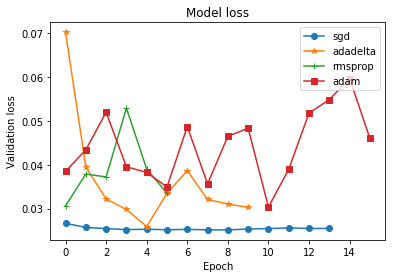

In [23]:
# Plot the validation loss of the models trained with the different optimization algorithms
plt.plot(sgd.history['val_loss'], marker='o')
plt.plot(adadelta.history['val_loss'], marker='*')
plt.plot(rmsprop.history['val_loss'], marker='+')
plt.plot(adam.history['val_loss'], marker='s')
plt.title('Model loss')
plt.ylabel('Validation loss')
plt.xlabel('Epoch')
plt.legend(['sgd', 'adadelta', 'rmsprop', 'adam'], loc='upper right')
plt.show()